### MLDS Lesson 11/13  
Data Cleaning with Pandas

In [1]:
import zipfile
import pandas as pd

In [2]:
trains_zip = zipfile.ZipFile(r'C:\Users\Yuchen\Downloads\train_split_00.csv.zip')
trains_df = pd.read_csv(trains_zip.open('train_split_00.csv')) 

Take a quick look at the data using the .head() method. Note, these methods are specific to Pandas Dataframe objects.

In [3]:
trains_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


The .memory_usage() method shows the memory in bytes that each column is using.

In [4]:
trains_df.memory_usage()

Index                    128
key                  8159400
fare_amount          8159400
pickup_datetime      8159400
pickup_longitude     8159400
pickup_latitude      8159400
dropoff_longitude    8159400
dropoff_latitude     8159400
passenger_count      8159400
dtype: int64

Based on the # of columns, we can see that the dataframe is using aproximately 62 Mb of data in-memory, i.e., in RAM.

In [5]:
len(trains_df.columns)

8

In [6]:
(8 * 8159400) / 1024

63745.3125

In [7]:
63745.3125 / 1024

62.25128173828125

In Excel, you will have slowdowns when opening the file and filtering columns as Excel needs to render each cell in-memory. The filtering process is also not computationally efficient. For a dataset of >100K rows, you may experience long filtering times depending on the # of columns. Our dataset has slightly over a million rows.

In [8]:
len(trains_df)

1019925

dtypes is an attribute (vs. a method), which shows us the data types of each column. This is an important practice to review data types as they can cause downstream issues. E.g., numbers are read in as strings and later on, you don't understand why your simple addition function is not working.

In [9]:
trains_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

It looks like the [pickup_datetime] columns was read in as an 'object'. We can convert it into a datetime object using the following:

In [10]:
trains_df['pickup_datetime'] = pd.to_datetime(trains_df['pickup_datetime'], infer_datetime_format=True)

In [11]:
trains_df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [12]:
trains_df.count()

key                  1019925
fare_amount          1019925
pickup_datetime      1019925
pickup_longitude     1019925
pickup_latitude      1019925
dropoff_longitude    1019915
dropoff_latitude     1019915
passenger_count      1019925
dtype: int64

Notice that there appear to be 10 fewer dropoff_longitude and dropoff_latitude points than the rest - this is most likely missing data. We can quickly take care of this using the .dropna() method:

In [13]:
trains_df = trains_df.dropna()

Looking at the counts again, we can see that the rows with NaNs have been removed - the entire dataset is now uniform.

In [14]:
trains_df.count()

key                  1019915
fare_amount          1019915
pickup_datetime      1019915
pickup_longitude     1019915
pickup_latitude      1019915
dropoff_longitude    1019915
dropoff_latitude     1019915
passenger_count      1019915
dtype: int64

**Here's a great cheat sheet for Pandas:**:  

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

We can also perform basic operations on columns:

In [15]:
min(trains_df['fare_amount'])

-44.9

Note that this is the same:

In [16]:
trains_df['fare_amount'].min()

-44.9

Summary statistics are simple to generate:

In [17]:
trains_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.019915e+06,1.019915e+06,1.019915e+06,1.019915e+06,1.019915e+06,1.019915e+06
mean,1.134569e+01,-7.252801e+01,3.993180e+01,-7.252832e+01,3.992346e+01,1.684924e+00
std,9.823068e+00,1.202854e+01,7.763938e+00,1.143688e+01,8.385776e+00,1.323645e+00
min,-4.490000e+01,-3.377681e+03,-3.116285e+03,-3.383297e+03,-3.114339e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073496e+01,-7.399138e+01,4.073405e+01,1.000000e+00
50%,8.500000e+00,-7.398180e+01,4.075268e+01,-7.398014e+01,4.075317e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076715e+01,-7.396367e+01,4.076813e+01,2.000000e+00
max,5.000000e+02,2.522271e+03,2.621628e+03,1.717003e+03,1.989728e+03,2.080000e+02


You can also create basic visualizations for your data using Pandas:

<AxesSubplot:>

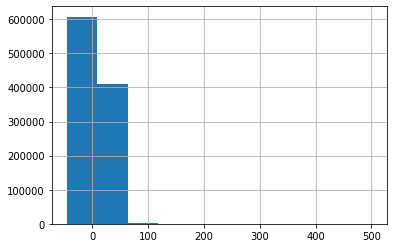

In [18]:
trains_df['fare_amount'].hist()

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

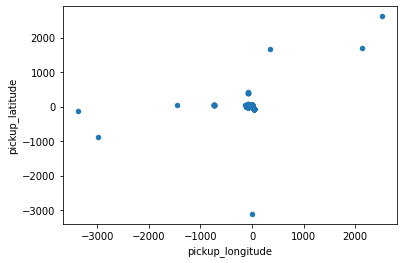

In [19]:
trains_df.plot.scatter(x='pickup_longitude', y='pickup_latitude')

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

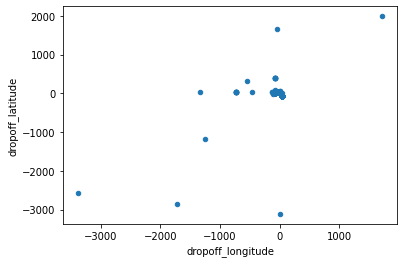

In [20]:
trains_df.plot.scatter(x='dropoff_longitude', y='dropoff_latitude')

Filtering is also a straightforward operation:

In [21]:
trains_df[(trains_df['pickup_datetime'] > '2012')]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
10,2012-04-08 07:30:50.0000002,5.3,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1
...,...,...,...,...,...,...,...,...
1019919,2013-08-19 15:29:10.0000003,8.0,2013-08-19 15:29:10+00:00,-73.894425,40.752588,-73.981989,40.768665,1
1019920,2013-10-30 18:55:20.0000001,5.5,2013-10-30 18:55:20+00:00,-73.988070,40.753954,-73.994386,40.744540,1
1019921,2013-11-03 21:18:53.0000001,19.0,2013-11-03 21:18:53+00:00,-73.975444,40.748933,-73.950062,40.718251,1
1019923,2012-01-09 08:59:15.0000005,9.7,2012-01-09 08:59:15+00:00,-73.981400,40.764200,-74.008400,40.745500,0


We can see that this operation only takes ~66 ms to run. The %timeit is a 'magic' Jupyter notebook function that repeats the function a number of times to determine the average runtime.

In [22]:
%timeit trains_df[(trains_df['pickup_datetime'] > '2012')]

66.1 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We can split our data for later processing by creating new dataframes based on the original:

In [23]:
y = trains_df['fare_amount']

In [24]:
# When you only pull 1 column, it creates a Series object. We use this method below to recreate y into a Dataframe object.
y = pd.DataFrame(y)

In [25]:
y.head()

,fare_amount
0,4.5
1,16.9
2,5.7
3,7.7
4,5.3


In [26]:
# Why do we have double brackets?
X = trains_df[['pickup_longitude', 'pickup_latitude']]

In [27]:
X

,pickup_longitude,pickup_latitude
0,-73.844311,40.721319
1,-74.016048,40.711303
2,-73.982738,40.761270
3,-73.987130,40.733143
4,-73.968095,40.768008
...,...,...
1019920,-73.988070,40.753954
1019921,-73.975444,40.748933
1019922,-73.993817,40.757103
1019923,-73.981400,40.764200
